# Train MLP


In [1]:
import sys
sys.path.append(r'F:\神经网络的鲁棒性探究\Model_package')

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
import numpy as np
from Model_package.MLP.MLP import*
from Model_package.FGSM.fgsm import get_fgsm_samples_data
from Model_package.Classifier.Classifier import Classifier
from Model_package.SimCLR.ContrastiveLoss import ContrastiveLoss
from Model_package.SimCLR.SimCLR import SimCLR
from Model_package.FullModel.FullModel import FullMLP
from Model_package import Utilites
from Model_package.Utilites import TestAccuracy
from GetData import GetDataLoader,GetMnistData
from Trainers.MLPTrainner import* 

In [3]:
mlp_classifier = Classifier(100).cpu()
torch.save(mlp_classifier,"./Models/classifier.pt")

In [4]:
mlp = MLP(28*28, "./Models/classifier.pt").cpu()

In [5]:
mlp

MLP(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): ReLU()
    (8): Linear(in_features=100, out_features=100, bias=True)
    (9): ReLU()
  )
  (classification): Classifier(
    (layers): ModuleList(
      (0): Linear(in_features=100, out_features=10, bias=True)
    )
  )
)

In [6]:
batchSize=256

In [7]:
EPOCHES=200

In [8]:
trainLoader,testLoader=GetDataLoader(*GetMnistData(),batchSize)  #数据的值在0~1的范围内。
imgSize=trainLoader.dataset[0][0].shape[1:]

In [9]:
mlp_train_losses, mlp_test_losses, mlp_test_accuracy = TrainMLP(mlp, trainLoader, testLoader, EPOCHES,device=torch.device("cpu"))

Epoch:  1  	Training Loss: 0.668241
Epoch:  1  \Test Accuracy: 89.890000%
Epoch:  2  	Training Loss: 0.241123
Epoch:  2  \Test Accuracy: 93.760000%
Epoch:  3  	Training Loss: 0.170148
Epoch:  3  \Test Accuracy: 95.270000%
Epoch:  4  	Training Loss: 0.131662
Epoch:  4  \Test Accuracy: 96.100000%
Epoch:  5  	Training Loss: 0.106930
Epoch:  5  \Test Accuracy: 96.250000%
Epoch:  6  	Training Loss: 0.090028
Epoch:  6  \Test Accuracy: 96.290000%
Epoch:  7  	Training Loss: 0.076929
Epoch:  7  \Test Accuracy: 96.440000%
Epoch:  8  	Training Loss: 0.067038
Epoch:  8  \Test Accuracy: 96.330000%
Epoch:  9  	Training Loss: 0.058887
Epoch:  9  \Test Accuracy: 96.770000%
Epoch:  10  	Training Loss: 0.051235
Epoch:  10  \Test Accuracy: 96.990000%
Epoch:  11  	Training Loss: 0.043334
Epoch:  11  \Test Accuracy: 96.890000%
Epoch:  12  	Training Loss: 0.037780
Epoch:  12  \Test Accuracy: 96.720000%
Epoch:  13  	Training Loss: 0.036057
Epoch:  13  \Test Accuracy: 96.980000%
Epoch:  14  	Training Loss: 0.

Epoch:  109  	Training Loss: 0.003198
Epoch:  109  \Test Accuracy: 97.770000%
Epoch:  110  	Training Loss: 0.003616
Epoch:  110  \Test Accuracy: 98.040000%
Epoch:  111  	Training Loss: 0.001009
Epoch:  111  \Test Accuracy: 97.940000%
Epoch:  112  	Training Loss: 0.000986
Epoch:  112  \Test Accuracy: 97.980000%
Epoch:  113  	Training Loss: 0.003375
Epoch:  113  \Test Accuracy: 97.860000%
Epoch:  114  	Training Loss: 0.001364
Epoch:  114  \Test Accuracy: 98.120000%
Epoch:  115  	Training Loss: 0.001939
Epoch:  115  \Test Accuracy: 97.900000%
Epoch:  116  	Training Loss: 0.001748
Epoch:  116  \Test Accuracy: 98.010000%
Epoch:  117  	Training Loss: 0.003563
Epoch:  117  \Test Accuracy: 97.750000%
Epoch:  118  	Training Loss: 0.006572
Epoch:  118  \Test Accuracy: 97.860000%
Epoch:  119  	Training Loss: 0.001421
Epoch:  119  \Test Accuracy: 97.950000%
Epoch:  120  	Training Loss: 0.000245
Epoch:  120  \Test Accuracy: 98.110000%
Epoch:  121  	Training Loss: 0.000036
Epoch:  121  \Test Accurac

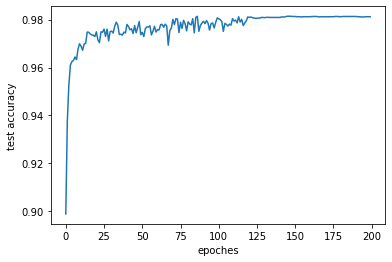

In [10]:
plt.figure()
plt.plot(range(EPOCHES), mlp_test_accuracy)
plt.xlabel('epoches')
plt.ylabel('test accuracy')
plt.show()

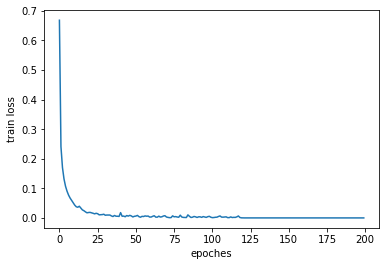

In [11]:
plt.figure()
plt.plot(mlp_train_losses)
plt.xlabel('epoches')
plt.ylabel('train loss')
plt.show()

In [12]:
mlp

MLP(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): ReLU()
  )
  (classification): Classifier(
    (layers): ModuleList(
      (0): Linear(in_features=100, out_features=10, bias=True)
    )
  )
)

In [6]:
MLP_extract_output = nn.Sequential(*list(mlp.children())[0])

In [7]:
layer_num = int(len(list(MLP_extract_output.children()))/2)

In [8]:
torch.save(mlp,"./Models/mlp_layer"+str(layer_num)+".pt")

In [9]:
int(len(list(MLP_extract_output.children()))/2)

5